In [2]:
import numpy as np
import matplotlib
import pandas as pd

dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

labels = dataset.iloc[:,16:].values

vals = pd.DataFrame(dataset.iloc[:,4:15].values)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(vals,labels,test_size=0.2,random_state=0)
X_train = np.array(X_train)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')
# Fit the model to the training data
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test), shuffle=False)


2024-06-27 13:22:35.249572: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 28.2424 - val_loss: 25.6954
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 23.2762 - val_loss: 24.8998
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 22.1358 - val_loss: 24.8231
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 21.9016 - val_loss: 24.8097
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 21.7486 - val_loss: 24.8286
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 21.7622 - val_loss: 24.8552
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 21.7847 - val_loss: 24.8761
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 21.7795 - val_loss: 24.8994
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 21.7933 - val_loss: 24.9217
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 21.7649 - val_loss: 24.9352


In [4]:
print(model.predict(X_test))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
[[16.621243]
 [16.621185]
 [16.621367]
 [16.621902]
 [16.621944]
 [16.621742]
 [16.621212]
 [16.621862]
 [16.621588]
 [16.621784]
 [16.62192 ]
 [16.621841]
 [16.621918]
 [16.621933]
 [16.621943]
 [16.621855]
 [16.621883]
 [16.62158 ]
 [16.621931]
 [16.621714]
 [16.621914]
 [16.621765]
 [16.621923]
 [16.621838]
 [16.621939]
 [16.621944]
 [16.621454]
 [16.621933]
 [16.62167 ]
 [16.621721]
 [16.62149 ]
 [16.621351]
 [16.62189 ]
 [16.621298]
 [16.621904]
 [16.621737]
 [16.621866]
 [16.62126 ]
 [16.621183]
 [16.621943]
 [16.621403]
 [16.621767]
 [16.62151 ]
 [16.62185 ]
 [16.6219  ]
 [16.621893]
 [16.621874]
 [16.621897]
 [16.621645]
 [16.621925]
 [16.621925]
 [16.621923]
 [16.621506]
 [16.621775]
 [16.621868]
 [16.621906]
 [16.621864]
 [16.621372]
 [16.621742]
 [16.621618]
 [16.621931]
 [16.621899]
 [16.621897]
 [16.62112 ]
 [16.621845]
 [16.621788]
 [16.62175 ]
 [16.62191 ]
 [16.6219  ]
 [16.621883]
 [16.621891]
 [16.621304]
 [16.621868]
 [16.621283]


In [5]:
import shap
# Use GradientExplainer with the model itself
explainer = shap.Explainer(model, X_test)
shap_values = explainer.shap_values(X_test)

# specify class to explain
cls = 0

# specify data point to explain
idx = 0


PermutationExplainer explainer: 169it [06:08,  2.25s/it]                         


In [7]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


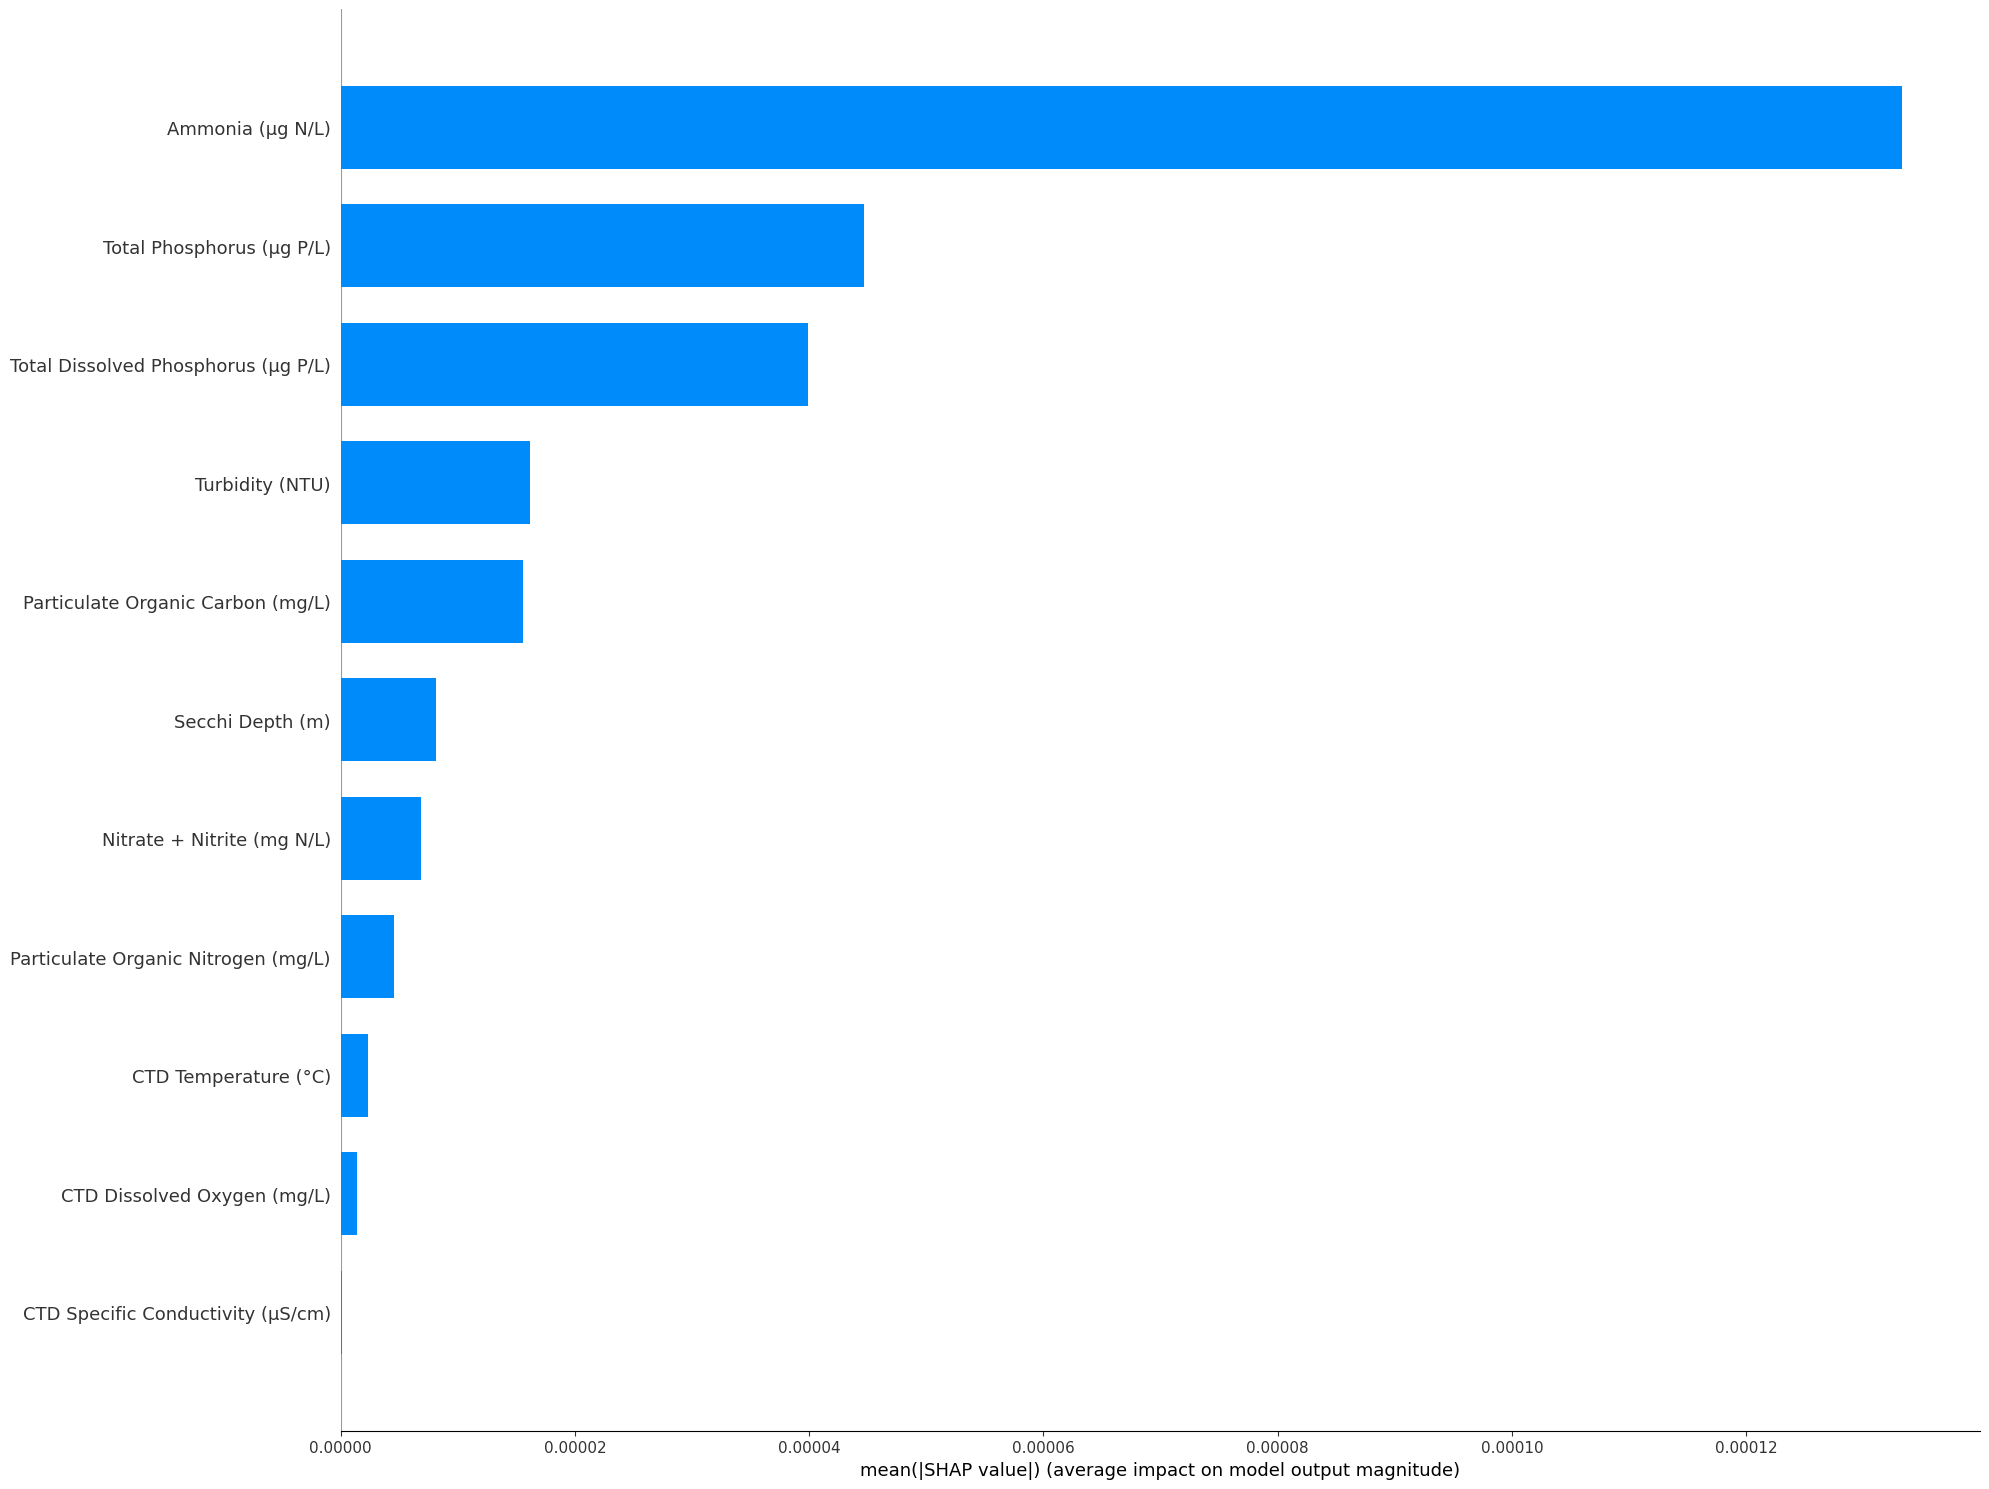

In [8]:
shap.summary_plot(shap_values, X_test,feature_names = features,plot_type="bar",plot_size = (20,15),show=False)